# Importing the required libraries:

In [1]:
#Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 200) # to display all the columns of the dataframes
pd.set_option('display.max_rows', 130)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # to supress scientific notation
%matplotlib inline

# Loading the data:

In [3]:
df_app = pd.read_csv('application_data.csv')

In [4]:
df_app.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,-9461,-637,-3648.00000,-2120,nan,1,1,0,1,1,0,Laborers,1.00000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08304,0.26295,0.13938,0.02470,0.03690,0.97220,0.61920,0.01430,0.00000,0.06900,0.08330,0.12500,0.03690,0.02020,0.01900,0.00000,0.00000,0.02520,0.03830,0.97220,0.63410,0.01440,0.00000,0.06900,0.08330,0.12500,0.03770,0.02200,0.01980,0.00000,0.00000,0.02500,0.03690,0.97220,0.62430,0.01440,0.00000,0.06900,0.08330,0.12500,0.03750,0.02050,0.01930,0.00000,0.00000,reg oper account,block of flats,0.01490,"Stone, brick",No,2.00000,2.00000,2.00000,2.00000,-1134.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,-291,nan,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31127,0.62225,nan,0.09590,0.05290,0.98510,0.79600,0.06050,0.08000,0.03450,0.29170,0.33330,0.01300,0.07730,0.05490,0.00390,0.00980,0.09240,0.05380,0.98510,0.80400,0.04970,0.08060,0.03450,0.29170,0.33330,0.01280,0.07900,0.05540,0.00000,0.00000,0.09680,0.05290,0.98510,0.79870,0.06080,0.08000,0.03450,0.29170,0.33330,0.01320,0.07870,0.05580,0.00390,0.01000,reg oper account,block of flats,0.07140,Block,No,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / 

# Routine check of the data:

In [5]:
df_app.shape

(307511, 122)

In [6]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307499.00000,307233.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,104582.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307509.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,134133.00000,306851.00000,246546.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,159080.00000,306490.00000,306490.00000,306490.00000,306490.00000,307510.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.57391,538396.20743,0.02087,-16036.99507,63815.04590,-4986.12033,-2994.20237,12.06109,1.00000,0.81989,0.19937,0.99813,0.28107,0.05672,2.15267,2.05246,2.03152,12.06342,0.01514,0.05077,0.04066,0.07817,0.23045,0.17955,0.50213,0.51439,0.51085,0.11744,0.08844,0.97773,0.75247,0.04462,0.07894,0.14972,0.22628,0.23189,0.06633,0.10077,0.10740,0.00881,0.02836,0.11423,0.08754,0.97707,0.75964,0.04255,0.07449,0.14519,0.22232,0.22806,0.06496,0.10564,0.10598,0.00808,0.02702,0.11785,0.08795,0.97775,0.75575,0.04460,0.07808,0.14921,0.22590,0.23162,0.06717,0.10195,0.10861,0.00865,0.02824,0.10255,1.42225,0.14342,1.40529,0.10005,-962.85879,0.00004,0.71002,0.0

In [7]:
df_app.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

# Identification and treatment of missing values:

In [8]:
df_app.isnull().sum()/len(df_app)*100 #To find the percentage of null value in each column

SK_ID_CURR                      0.00000
TARGET                          0.00000
NAME_CONTRACT_TYPE              0.00000
CODE_GENDER                     0.00000
FLAG_OWN_CAR                    0.00000
FLAG_OWN_REALTY                 0.00000
CNT_CHILDREN                    0.00000
AMT_INCOME_TOTAL                0.00000
AMT_CREDIT                      0.00000
AMT_ANNUITY                     0.00390
AMT_GOODS_PRICE                 0.09040
NAME_TYPE_SUITE                 0.42015
NAME_INCOME_TYPE                0.00000
NAME_EDUCATION_TYPE             0.00000
NAME_FAMILY_STATUS              0.00000
NAME_HOUSING_TYPE               0.00000
REGION_POPULATION_RELATIVE      0.00000
DAYS_BIRTH                      0.00000
DAYS_EMPLOYED                   0.00000
DAYS_REGISTRATION               0.00000
DAYS_ID_PUBLISH                 0.00000
OWN_CAR_AGE                    65.99081
FLAG_MOBIL                      0.00000
FLAG_EMP_PHONE                  0.00000
FLAG_WORK_PHONE                 0.00000


In [9]:
df_app = df_app[df_app.columns[df_app.isnull().mean()<.5]] #Drop columns with more than 50% null values

In [10]:
df_app.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,-9461,-637,-3648.00000,-2120,1,1,0,1,1,0,Laborers,1.00000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26295,0.13938,0.97220,0.08330,0.97220,0.08330,0.97220,0.08330,0.01490,No,2.00000,2.00000,2.00000,2.00000,-1134.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,-291,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62225,nan,0.98510,0.29170,0.98510,0.29170,0.98510,0.29170,0.07140,No,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,-19046,-225,-4260.00000,-2531,1,1,1,1,1,0,Laborers,1.00000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.55591,0.72957,nan,nan,nan,nan,nan,nan,nan,NaN,0.00000,0.00000,0.00000,0.00000,-815.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,100006,0,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,-19005,-3039,-9833.00000,-2437,1,1,0,1,0,0,Laborers,2.00000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65044,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.00000,0.00000,2.00000,0.00000,-617.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,-19932,-3038,-4311.00000,-3458,1,1,0,1,0,0,Core staff,1.00000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32274,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.00000,0.00000,0.00000,0.00000,-1106.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,100008,0,Cash loans,M,N,Y,0,99000.00000,490495.50000,27517.50000,454500.00000,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.03579,-16941,-1588,-4

In [11]:
df_app.shape

(307511, 81)

##### So, a total of 41 rows have been dropped which contained over 50% null values.

#### Now, let's figure out columns which have relatively lower (<13%) null values. Also, determining the continuous and categorical values will help us decide the method of imputaion.

In [12]:
df_app.nunique().sort_values(ascending=False)

SK_ID_CURR                      307511
EXT_SOURCE_2                    119831
DAYS_BIRTH                       17460
DAYS_REGISTRATION                15688
AMT_ANNUITY                      13672
DAYS_EMPLOYED                    12574
DAYS_ID_PUBLISH                   6168
AMT_CREDIT                        5603
TOTALAREA_MODE                    5116
DAYS_LAST_PHONE_CHANGE            3773
AMT_INCOME_TOTAL                  2548
AMT_GOODS_PRICE                   1002
EXT_SOURCE_3                       814
FLOORSMAX_AVG                      403
YEARS_BEGINEXPLUATATION_AVG        285
YEARS_BEGINEXPLUATATION_MEDI       245
YEARS_BEGINEXPLUATATION_MODE       221
REGION_POPULATION_RELATIVE          81
ORGANIZATION_TYPE                   58
FLOORSMAX_MEDI                      49
OBS_30_CNT_SOCIAL_CIRCLE            33
OBS_60_CNT_SOCIAL_CIRCLE            33
FLOORSMAX_MODE                      25
AMT_REQ_CREDIT_BUREAU_YEAR          25
AMT_REQ_CREDIT_BUREAU_MON           24
HOUR_APPR_PROCESS_START  

In [13]:
df_app.columns[(df_app.isnull().mean()<.13) & (df_app.isnull().mean()>0)]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

#### So, the above columns have null values of lower magnitude(<13%)

#### Let's further analyze these columns to find continuous and categorical variables.

In [14]:
df_app[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS','EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']].nunique().sort_values(ascending=False)

EXT_SOURCE_2                119831
AMT_ANNUITY                  13672
DAYS_LAST_PHONE_CHANGE        3773
AMT_GOODS_PRICE               1002
OBS_60_CNT_SOCIAL_CIRCLE        33
OBS_30_CNT_SOCIAL_CIRCLE        33
CNT_FAM_MEMBERS                 17
DEF_30_CNT_SOCIAL_CIRCLE        10
DEF_60_CNT_SOCIAL_CIRCLE         9
NAME_TYPE_SUITE                  7
dtype: int64

#### The columns with higher unique values tend to be continuous.

### For continuous values:

In [15]:
df_app[['AMT_ANNUITY','EXT_SOURCE_2','DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE']]

,AMT_ANNUITY,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE
0,24700.50000,0.26295,-1134.00000,351000.00000
1,35698.50000,0.62225,-828.00000,1129500.00000
2,6750.00000,0.55591,-815.00000,135000.00000
3,29686.50000,0.65044,-617.00000,297000.00000
4,21865.50000,0.32274,-1106.00000,513000.00000
...,...,...,...,...
307506,27558.00000,0.68163,-273.00000,225000.00000
307507,12001.50000,0.11599,0.00000,225000.00000
307508,29979.00000,0.53572,-1909.00000,585000.00000
307509,20205.00000,0.51416,-322.00000,319500.00000


In [16]:
df_app[['AMT_ANNUITY','EXT_SOURCE_2','DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE']].isnull().sum()/len(df_app)*100

AMT_ANNUITY              0.00390
EXT_SOURCE_2             0.21463
DAYS_LAST_PHONE_CHANGE   0.00033
AMT_GOODS_PRICE          0.09040
dtype: float64

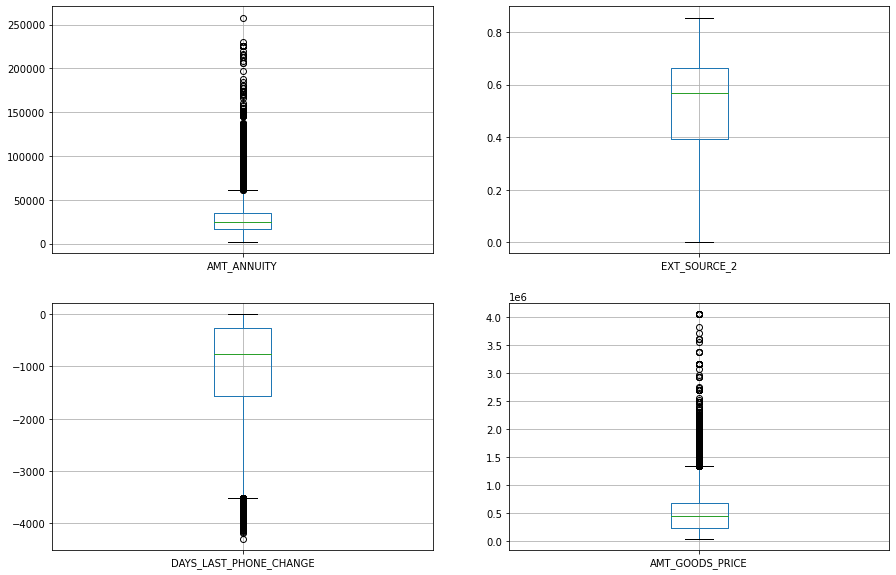

In [17]:
#Boxplot to help visualize outliers in continuous values

fig = plt.figure(figsize=(15,10))
ax1 =fig.add_subplot(2,2,1)
df_app[['AMT_ANNUITY']].boxplot(ax = ax1)
ax2 =fig.add_subplot(2,2,2)
df_app[['EXT_SOURCE_2']].boxplot(ax = ax2)
ax3 =fig.add_subplot(2,2,3)
df_app[['DAYS_LAST_PHONE_CHANGE']].boxplot(ax = ax3)
ax4 =fig.add_subplot(2,2,4)
df_app[['AMT_GOODS_PRICE']].boxplot(ax = ax4)
plt.show()

#### Given the large number of outliers in 'AMT_ANNUITY' and 'AMT_GOODS_PRICE', the suitable way to impute the missing values would be through their respective medians.

### For categorical values:

In [18]:
df_app[['NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']]

,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,Unaccompanied,1.00000,2.00000,2.00000,2.00000,2.00000
1,Family,2.00000,1.00000,0.00000,1.00000,0.00000
2,Unaccompanied,1.00000,0.00000,0.00000,0.00000,0.00000
3,Unaccompanied,2.00000,2.00000,0.00000,2.00000,0.00000
4,Unaccompanied,1.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...
307506,Unaccompanied,1.00000,0.00000,0.00000,0.00000,0.00000
307507,Unaccompanied,1.00000,0.00000,0.00000,0.00000,0.00000
307508,Unaccompanied,1.00000,6.00000,0.00000,6.00000,0.00000
307509,Unaccompanied,2.00000,0.00000,0.00000,0.00000,0.00000


In [19]:
df_app[['NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].isnull().sum()/len(df_app)*100

NAME_TYPE_SUITE            0.42015
CNT_FAM_MEMBERS            0.00065
OBS_30_CNT_SOCIAL_CIRCLE   0.33202
DEF_30_CNT_SOCIAL_CIRCLE   0.33202
OBS_60_CNT_SOCIAL_CIRCLE   0.33202
DEF_60_CNT_SOCIAL_CIRCLE   0.33202
dtype: float64

In [20]:
# To find out the most common values(mode) for the above columns

df_app[['NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].mode()

,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,Unaccompanied,2.00000,0.00000,0.00000,0.00000,0.00000


#### For categorical values, imputation through mode values seems like a logical choice, given that the percentage of missing values also happens to be very low.

#### Upon further manual inspection of the dataset, we find out certain columns have missing values marked as 'XNA', namely, 'CODE_GENDER' and 'ORGANIZATION_TYPE'.

In [21]:
df_app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [22]:
#Percentage of null values (XNA) in the column

len(df_app[df_app['CODE_GENDER'] == 'XNA'])/len(df_app)*100

0.0013007664766463637

#### Given that the number of such values is quite low (.0013%), we can safely ignore these values for our analysis purposes.

In [23]:
df_app['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [24]:
len(df_app[df_app['ORGANIZATION_TYPE'] == 'XNA'])/len(df_app)*100

18.00716071945394

#### Since the proportion of missing values is significant and there is no way to impute the data without skewing it, the best option here would be to drop these rows.

In [25]:
df_app = df_app[~(df_app['ORGANIZATION_TYPE'] == 'XNA')]

In [26]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,-9461,-637,-3648.00000,-2120,1,1,0,1,1,0,Laborers,1.00000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26295,0.13938,0.97220,0.08330,0.97220,0.08330,0.97220,0.08330,0.01490,No,2.00000,2.00000,2.00000,2.00000,-1134.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,-291,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62225,nan,0.98510,0.29170,0.98510,0.29170,0.98510,0.29170,0.07140,No,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,-19046,-225,-4260.00000,-2531,1,1,1,1,1,0,Laborers,1.00000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.55591,0.72957,nan,nan,nan,nan,nan,nan,nan,NaN,0.00000,0.00000,0.00000,0.00000,-815.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,100006,0,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,-19005,-3039,-9833.00000,-2437,1,1,0,1,0,0,Laborers,2.00000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65044,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.00000,0.00000,2.00000,0.00000,-617.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,-19932,-3038,-4311.00000,-3458,1,1,0,1,0,0,Core staff,1.00000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32274,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.00000,0.00000,0.00000,0.00000,-1106.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [27]:
df_app.shape

(252137, 81)

#### So after handling missing values, we have dropped 41 columns and 55374 rows.

# Data Type and Value Analysis

In [28]:
df_app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,-9461,-637,-3648.00000,-2120,1,1,0,1,1,0,Laborers,1.00000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26295,0.13938,0.97220,0.08330,0.97220,0.08330,0.97220,0.08330,0.01490,No,2.00000,2.00000,2.00000,2.00000,-1134.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,-291,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62225,nan,0.98510,0.29170,0.98510,0.29170,0.98510,0.29170,0.07140,No,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,-19046,-225,-4260.00000,-2531,1,1,1,1,1,0,Laborers,1.00000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.55591,0.72957,nan,nan,nan,nan,nan,nan,nan,NaN,0.00000,0.00000,0.00000,0.00000,-815.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,100006,0,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,-19005,-3039,-9833.00000,-2437,1,1,0,1,0,0,Laborers,2.00000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65044,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.00000,0.00000,2.00000,0.00000,-617.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,-19932,-3038,-4311.00000,-3458,1,1,0,1,0,0,Core staff,1.00000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32274,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.00000,0.00000,0.00000,0.00000,-1106.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,100008,0,Cash loans,M,N,Y,0,99000.00000,490495.50000,27517.50000,454500.00000,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.03579,-16941,-1588,-4

In [29]:
df_app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [30]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [31]:
#Converting the numeric columns to appropriate data type

df_app[['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']].apply(pd.to_numeric)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.00000,406597.50000,24700.50000,351000.00000,0.01880,-9461,-637,-3648.00000,-2120,1,1,0,1,1,0,1.00000,2,2,10,0,0,0,0,0,0,0.26295,0.13938,0.97220,0.08330,0.97220,0.08330,0.97220,0.08330,0.01490,2.00000,2.00000,2.00000,2.00000,-1134.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,0,270000.00000,1293502.50000,35698.50000,1129500.00000,0.00354,-16765,-1188,-1186.00000,-291,1,1,0,1,1,0,2.00000,1,1,11,0,0,0,0,0,0,0.62225,nan,0.98510,0.29170,0.98510,0.29170,0.98510,0.29170,0.07140,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,0,67500.00000,135000.00000,6750.00000,135000.00000,0.01003,-19046,-225,-4260.00000,-2531,1,1,1,1,1,0,1.00000,2,2,9,0,0,0,0,0,0,0.55591,0.72957,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,0.00000,0.00000,-815.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,100006,0,0,135000.00000,312682.50000,29686.50000,297000.00000,0.00802,-19005,-3039,-9833.00000,-2437,1,1,0,1,0,0,2.00000,2,2,17,0,0,0,0,0,0,0.65044,nan,nan,nan,nan,nan,nan,nan,nan,2.00000,0.00000,2.00000,0.00000,-617.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,0,121500.00000,513000.00000,21865.50000,513000.00000,0.02866,-19932,-3038,-4311.00000,-3458,1,1,0,1,0,0,1.00000,2,2,11,0,0,0,0,1,1,0.32274,nan,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,0.00000,0.00000,-1106.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,0,153000.00000,331920.00000,16096.50000,225000.00000,0.02262,-16705,-7258,-9798.00000,-259,1,1,0,1,0,0,1.00000,2,2,11,0,0,0,0,0,0,0.53073,nan,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,0.00000,0.00000,0.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
307506,456251,0,0,157500.00000,254700.00000,27558.00000,225000.00000,0.03256,-9327,-236,-8456.00000,-1982,1,1,0,1,0,0,1.00000,1,1,15,0,0,0,0,0,0,0.68163,nan,0.98760,0.60420,0.97820,0.45830,0.98760,0.60420,0.28980,0.00000,0.00000,0.00000,0.00000,-273.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
307508,456253,0,0,153000.00000,677664.00000,29979.00000,585000.00000,0.00500,-14966,-7921,-6737.00000,-5150,1,1,0,1,0,1,1.00000,3,3,9,0,0,0,0,1,1,0.53572,0.21886,0.98160,0.16670,0.98160,0.16670,0.98160,0.16670,0.79700,6.00000,0.000

In [32]:
df_app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


#### Now through manual inspection we find the given columns containing days to be in negative. We convert them into positive values.

In [33]:
df_app[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = df_app[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].apply(abs)

In [34]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,9461,637,3648.00000,2120,1,1,0,1,1,0,Laborers,1.00000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26295,0.13938,0.97220,0.08330,0.97220,0.08330,0.97220,0.08330,0.01490,No,2.00000,2.00000,2.00000,2.00000,1134.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,16765,1188,1186.00000,291,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62225,nan,0.98510,0.29170,0.98510,0.29170,0.98510,0.29170,0.07140,No,1.00000,0.00000,1.00000,0.00000,828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,19046,225,4260.00000,2531,1,1,1,1,1,0,Laborers,1.00000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.55591,0.72957,nan,nan,nan,nan,nan,nan,nan,NaN,0.00000,0.00000,0.00000,0.00000,815.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,100006,0,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,19005,3039,9833.00000,2437,1,1,0,1,0,0,Laborers,2.00000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.65044,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.00000,0.00000,2.00000,0.00000,617.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,19932,3038,4311.00000,3458,1,1,0,1,0,0,Core staff,1.00000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32274,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.00000,0.00000,0.00000,0.00000,1106.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## Outlier Analysis

In [35]:
df_app[['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']].describe(percentiles=[.05,.25,.5,.75,.95])

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,252137.00000,252137.00000,252137.00000,252125.00000,251881.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252135.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,251633.00000,202241.00000,129796.00000,127280.00000,129796.00000,127280.00000,129796.00000,127280.00000,131084.00000,251288.00000,251288.00000,251288.00000,251288.00000,252136.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,252137.00000,218281.00000,218281.00000,218281.00000,218281.00000,218281.00000,218281.00000
mean,0.49851,175914.07080,611398.45758,27812.32517,549405.66819,0.02089,14769.13317,2384.16932,4635.43085,2800.63972,1.00000,0.99995,0.24315,0.99787,0.27768,0.06350,2.25252,2.04461,2.02333,12.20330,0.01724,0.06192,0.04959,0.08977,0.28107,0.21899,0.51614,0.50034,0.97750,0.22735,0.97681,0.22332,0.97752,0.22698,0.10330,1.41576,0.13995,1.39869,0.09766,971.03859,0.00005,0.76287,0.00008,0.01625,0.00867,0.00021,0.09701,0.00459,0.00002,0.00477,0.00001,0.00424,0.00353,0.00144,0.01193,0.00032,0.00984,0.00071,0.00061,0.00041,0.00659,0.00698,0.03407,0.28200,0.25981,1.85628
std,0.76316,258851.58775,406527.19987,14647.75910,373268.53458,0.01387,3662.57377,2338.36016,3252.16916,1515.36063,0.00199,0.00690,0.42899,0.04606,0.44786,0.24386,0.94212,0.51238,0.50642,3.29980,0.13017,0.24101,0.21709,0.28585,0.44952,0.41356,0.18992,0.19601,0.06110,0.14550,0.06654,0.14456,0.06185,0.14594,0.10867,2.39998,0.44193,2.37846,0.35815,827.30530,0.00718,0.42533,0.00891,0.12645,0.09271,0.01436,0.29598,0.06761,0.00488,0.06891,0.00282,0.06501,0.05934,0.03797,0.10855,0.01792,0.09869,0.02664,0.02479,0.02021,0.08509,0.11102,0.20283,0.94837,0.82368,1.82630
min,0.00000,25650.00000,45000.00000,1980.00000,40500.00000,0.00029,7489.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00053,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5%,0.00000,72000.00000,143910.00000,9000.00000,135000.00000,0.00496,9167.00000,206.00000,311.00000,327.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,7.00000,0

#### Based on the difference between max value and 95th percentile, we choose 5 variables to further analyze using boxplot.

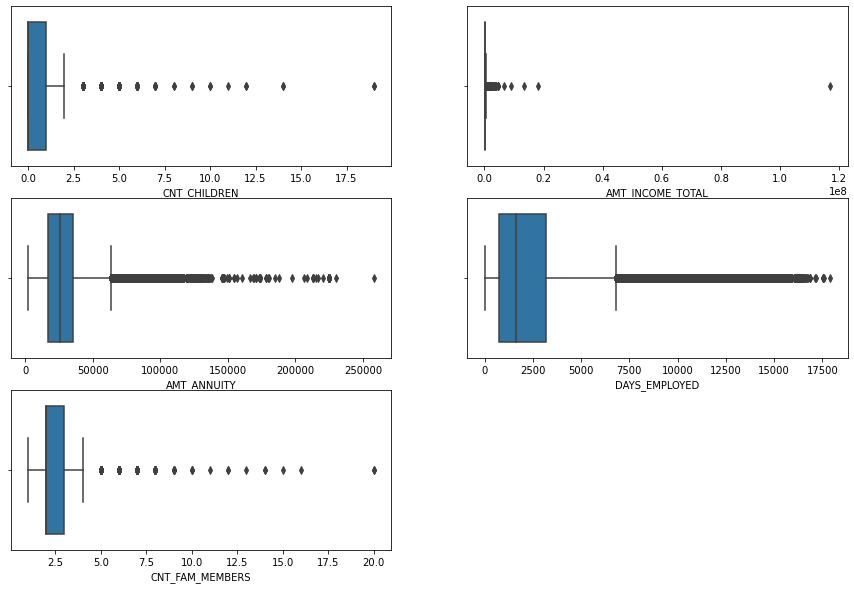

In [36]:
plt.figure(figsize = (15, 10))
plt.subplot(3, 2, 1)
sns.boxplot(x ='CNT_CHILDREN', data = df_app)
plt.subplot(3, 2, 2)
sns.boxplot(x ='AMT_INCOME_TOTAL', data = df_app)
plt.subplot(3, 2, 3)
sns.boxplot(x ='AMT_ANNUITY', data = df_app)
plt.subplot(3, 2, 4)
sns.boxplot(x ='DAYS_EMPLOYED', data = df_app)
plt.subplot(3, 2, 5)
sns.boxplot(x ='CNT_FAM_MEMBERS', data = df_app)
plt.show()

#### For 'CNT_CHILDREN' the maximum number of value(95%) is less than or equal to 2. Outliers here denote a higher number of children,more than 5, which is rare but not impossible.
#### For 'AMT_INCOME_TOTAL', maximum value is extremely high, which,again, is improbable but not impossible.
#### For 'AMT_ANNUITY' extremely high value (above 100000) is rare but makes sense where the loan amount is extremely high.
#### For 'DAYS_EMPLOYED' values above 15000 days(above 40 years) is rare but possible for people especially in entrepreneurial jobs.
#### For 'CNT_FAM_MEMBERS', again a value in the outlier region is rare but probable (part of a large family).

## Binning of continuous variables

#### Upon inspection, we find that the two columns 'AMT_INCOME_TOTAL' and 'AMT_CREDIT', are two continuous variables, suitable for binning.

In [37]:
df_app['AMT_INCOME_TOTAL'].describe()

count      252137.00000
mean       175914.07080
std        258851.58775
min         25650.00000
25%        112500.00000
50%        157500.00000
75%        211500.00000
max     117000000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [38]:
#Creating bins to convert 'AMT_INCOME_TOTAL' into categorical value

df_app['INCOME_BRACKETS']=pd.cut(df_app['AMT_INCOME_TOTAL'],[0,100000,125000,175000,225000,1000000000],labels=['Very Low','Low','Medium','High','Very High'])

In [39]:
df_app['INCOME_BRACKETS']

0              High
1         Very High
2          Very Low
3            Medium
4               Low
            ...    
307504       Medium
307506       Medium
307508       Medium
307509       Medium
307510       Medium
Name: INCOME_BRACKETS, Length: 252137, dtype: category
Categories (5, object): [Very Low < Low < Medium < High < Very High]

In [40]:
df_app['AMT_CREDIT'].describe()

count    252137.00000
mean     611398.45758
std      406527.19987
min       45000.00000
25%      277969.50000
50%      521280.00000
75%      829224.00000
max     4050000.00000
Name: AMT_CREDIT, dtype: float64

In [41]:
##Creating bins to convert 'AMT_CREDIT' into categorical value

df_app['CREDIT_BRACKETS']=pd.cut(df_app['AMT_CREDIT'],[0,200000,500000,800000,1000000,1000000000],labels=['Very Low','Low','Medium','High','Very High'])

In [42]:
df_app['CREDIT_BRACKETS']

0               Low
1         Very High
2          Very Low
3               Low
4            Medium
            ...    
307504          Low
307506          Low
307508       Medium
307509          Low
307510       Medium
Name: CREDIT_BRACKETS, Length: 252137, dtype: category
Categories (5, object): [Very Low < Low < Medium < High < Very High]

# EDA

In [43]:
print('Percentage of people with payment difficulties : ',100*round(len(df_app[df_app.TARGET == 1])/len(df_app),4),'%' )
print('Percentage of people with no difficulties : ',100*round(len(df_app[df_app.TARGET == 0])/len(df_app),4),'%')

Percentage of people with payment difficulties :  8.66 %
Percentage of people with no difficulties :  91.34 %


#### Creating two target variables for comparative analysis

In [44]:
#Creating two dataframes to segregate dataset based on target value where 1 means clients with payment difficulties and 0 means no difficulties.

df_app0 = df_app[df_app.TARGET == 0]
df_app1 = df_app[df_app.TARGET == 1]

In [45]:
print('Imbalance Ratio : ', round(len(df_app0)/len(df_app1),4))

Imbalance Ratio :  10.5474


## Univariate Analysis

#### Categorical univariate analysis for TARGET = 0 and 1.

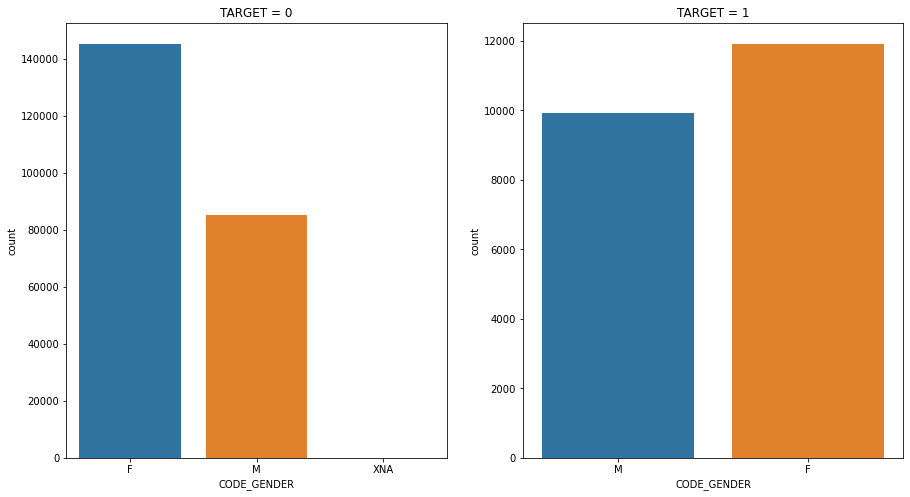

In [46]:
#Visualizing the distribution of data based on gender

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.title("TARGET = 0")
sns.countplot(x ='CODE_GENDER',data=df_app0)
plt.subplot(1, 2, 2)
plt.title("TARGET = 1")
sns.countplot(x ='CODE_GENDER',data=df_app1)

plt.show()

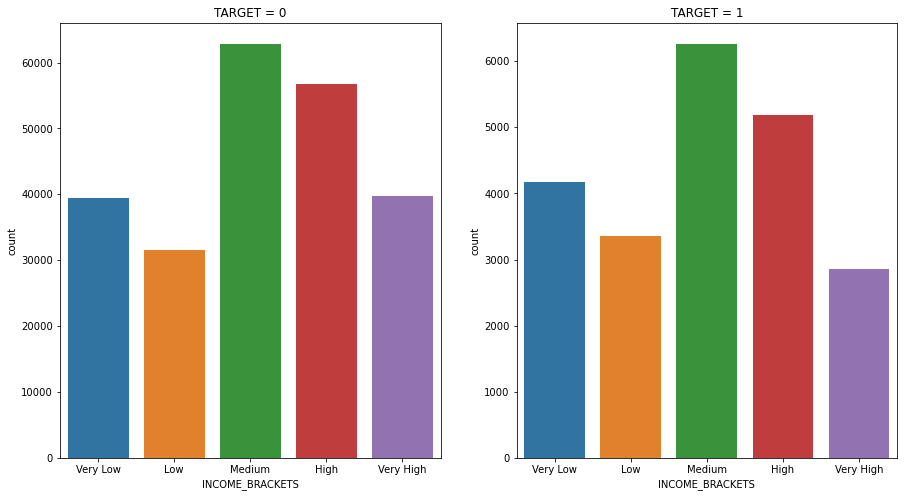

In [47]:
#Visualizing the distribution of data based on income categories of the clients

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.title("TARGET = 0")
sns.countplot(x ='INCOME_BRACKETS',data=df_app0)
plt.subplot(1, 2, 2)
plt.title("TARGET = 1")
sns.countplot(x ='INCOME_BRACKETS',data=df_app1)

plt.show()

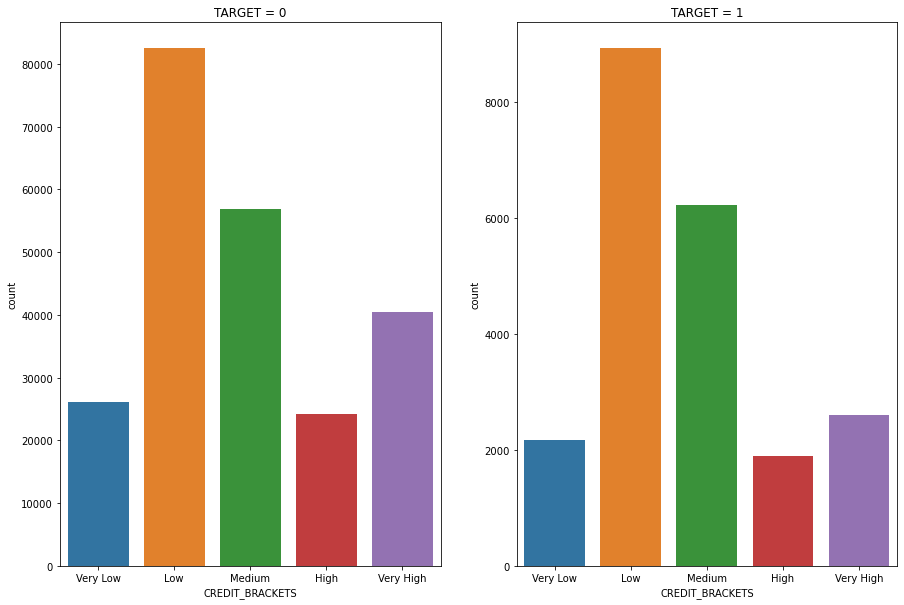

In [48]:
#Visualizing the distribution of data based on credit categories

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.title("TARGET = 0")
sns.countplot(x ='CREDIT_BRACKETS',data=df_app0)
plt.subplot(1, 2, 2)
plt.title("TARGET = 1")
sns.countplot(x ='CREDIT_BRACKETS',data=df_app1)

plt.show()

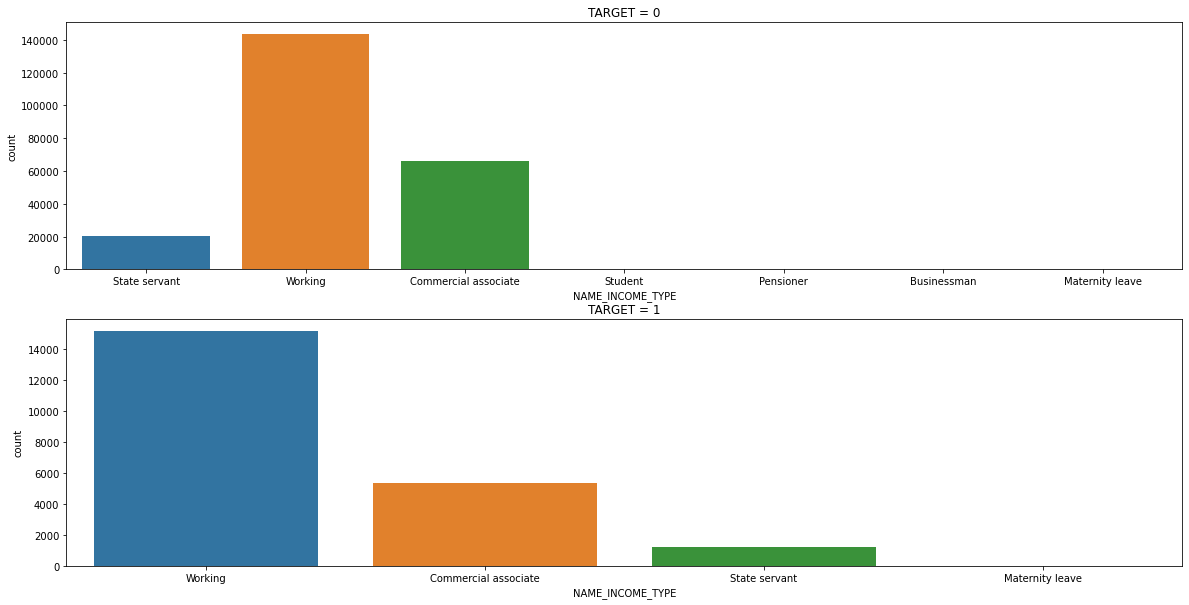

In [49]:
#Visualizing the distribution of data based on income type of the clients

plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)
plt.title("TARGET = 0")
sns.countplot(x ='NAME_INCOME_TYPE',data=df_app0)
plt.subplot(2, 1, 2)
plt.title("TARGET = 1")
sns.countplot(x ='NAME_INCOME_TYPE',data=df_app1)

plt.show()

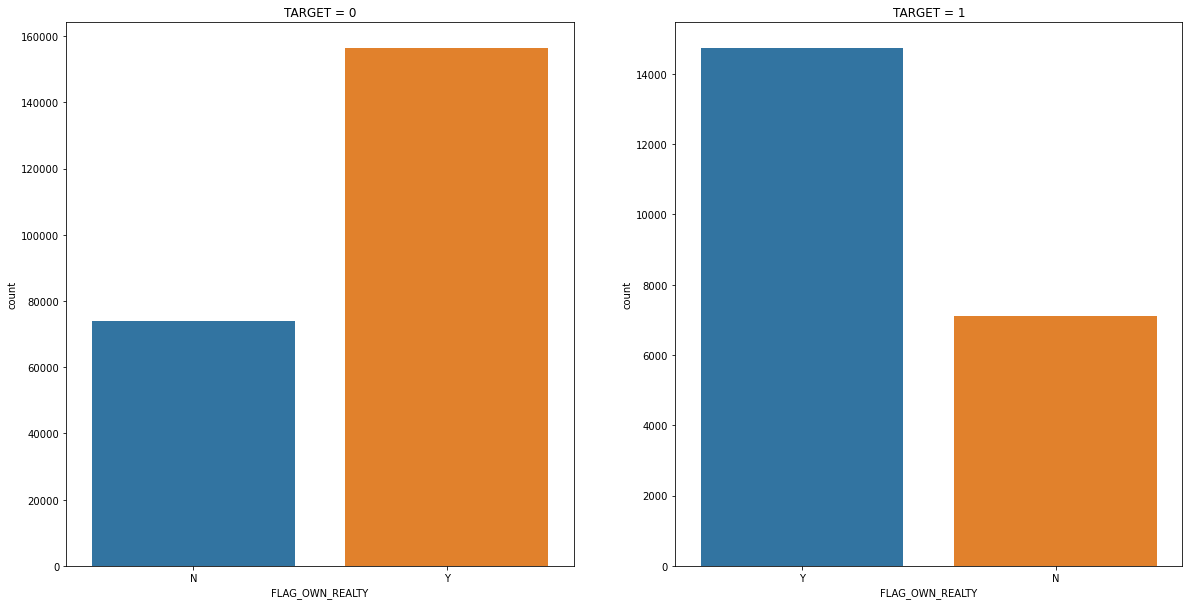

In [50]:
#Visualizing the distribution of data based on the clients owning a flat/house

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("TARGET = 0")
sns.countplot(x ='FLAG_OWN_REALTY',data=df_app0)
plt.subplot(1, 2, 2)
plt.title("TARGET = 1")
sns.countplot(x ='FLAG_OWN_REALTY',data=df_app1)

plt.show()

#### Continuous univariate analysis for TARGET = 0 and 1.

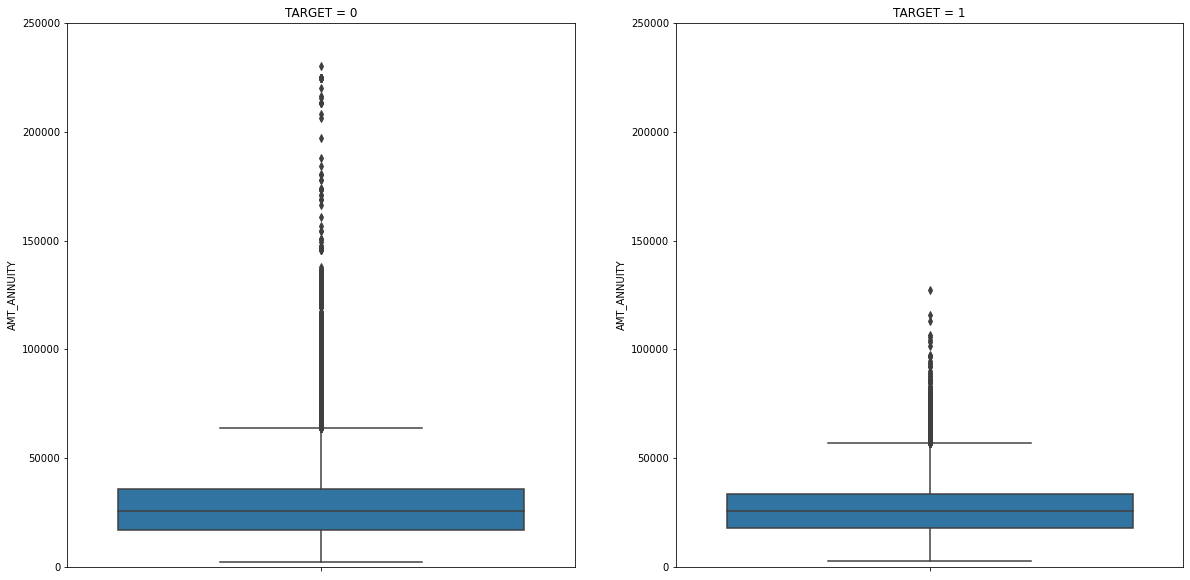

In [51]:
#Visualizing the spread of loan annuity across targets

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("TARGET = 0")
plt.ylim(0, 250000)
sns.boxplot(x ='AMT_ANNUITY',data=df_app0,orient='v')
plt.subplot(1, 2, 2)
plt.title("TARGET = 1")
plt.ylim(0, 250000)
sns.boxplot(x ='AMT_ANNUITY',data=df_app1,orient='v')

plt.show()

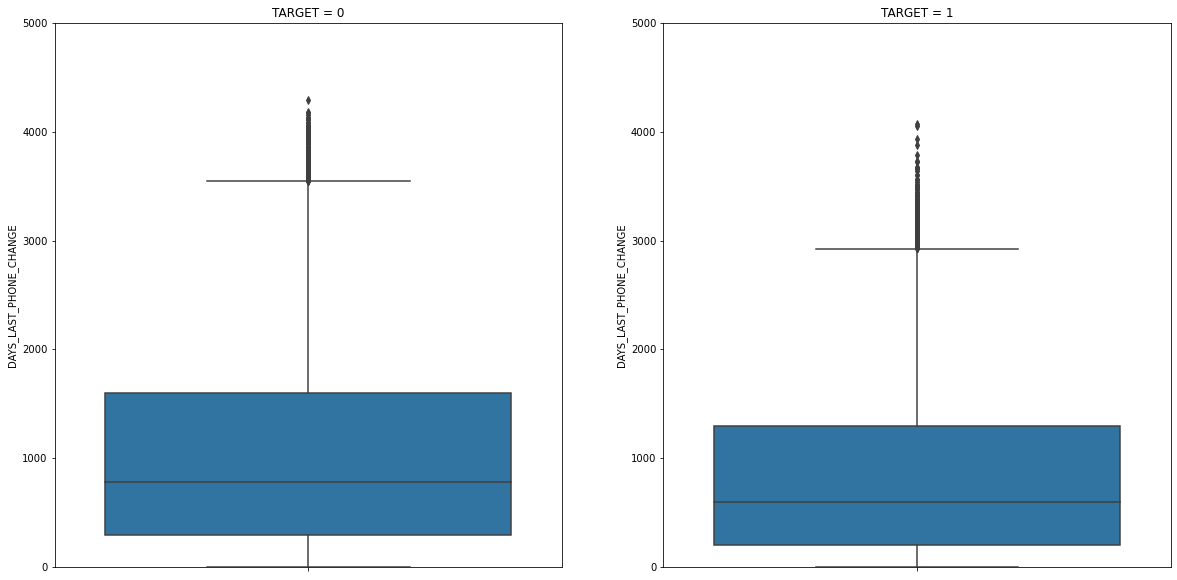

In [52]:
#Visualizing the spread of data regarding the clients' day of last change of phone across targets

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("TARGET = 0")
plt.ylim(0,5000)
sns.boxplot(x ='DAYS_LAST_PHONE_CHANGE',data=df_app0,orient='v')
plt.subplot(1, 2, 2)
plt.title("TARGET = 1")
plt.ylim(0,5000)
sns.boxplot(x ='DAYS_LAST_PHONE_CHANGE',data=df_app1,orient='v')

plt.show()

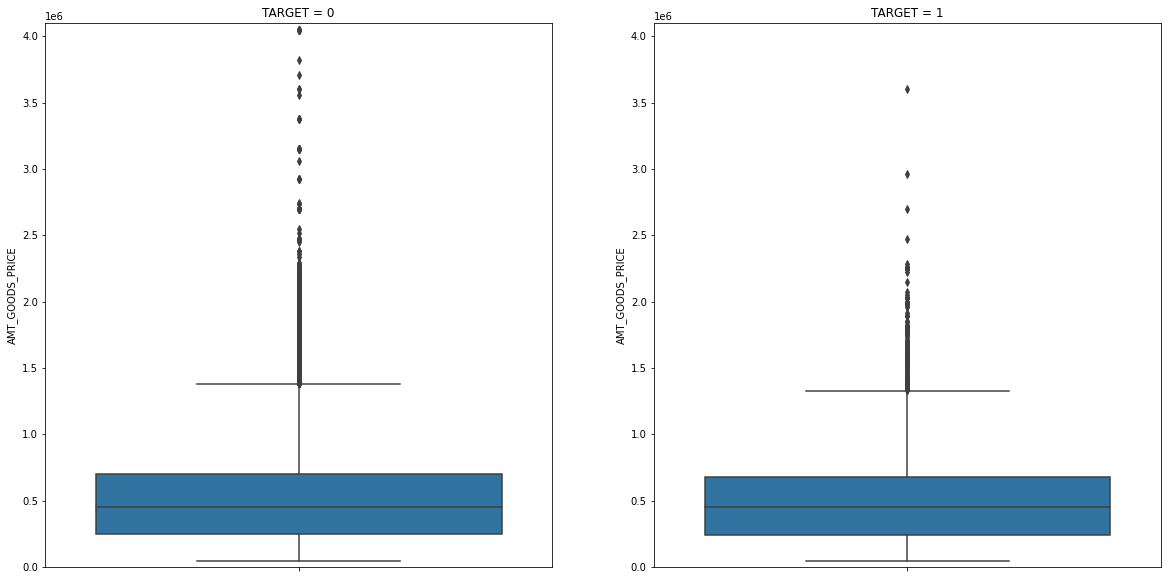

In [53]:
#Visualizing the spread of price of goods for which loan was sanctioned across targets

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("TARGET = 0")
plt.ylim(0,4100000)
sns.boxplot(x ='AMT_GOODS_PRICE',data=df_app0,orient='v')
plt.subplot(1, 2, 2)
plt.title("TARGET = 1")
plt.ylim(0,4100000)
sns.boxplot(x ='AMT_GOODS_PRICE',data=df_app1,orient='v')

plt.show()

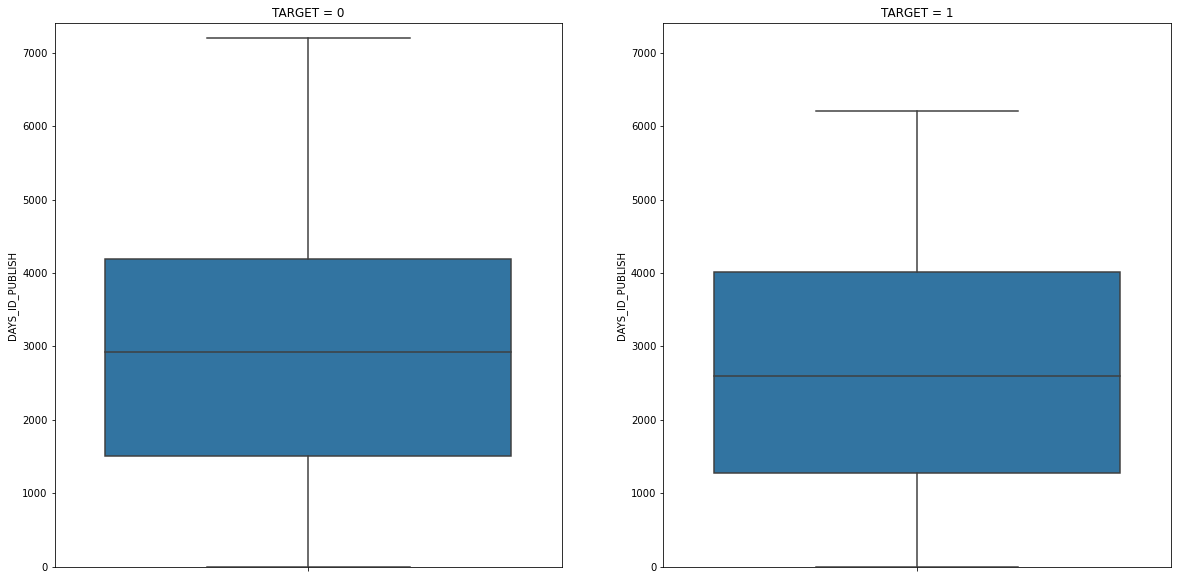

In [54]:
#Visualizing the spread of data regarding the clients' day of last change of ID across targets

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("TARGET = 0")
plt.ylim(0,7400)
sns.boxplot(x ='DAYS_ID_PUBLISH',data=df_app0,orient='v')
plt.subplot(1, 2, 2)
plt.title("TARGET = 1")
plt.ylim(0,7400)
sns.boxplot(x ='DAYS_ID_PUBLISH',data=df_app1,orient='v')

plt.show()

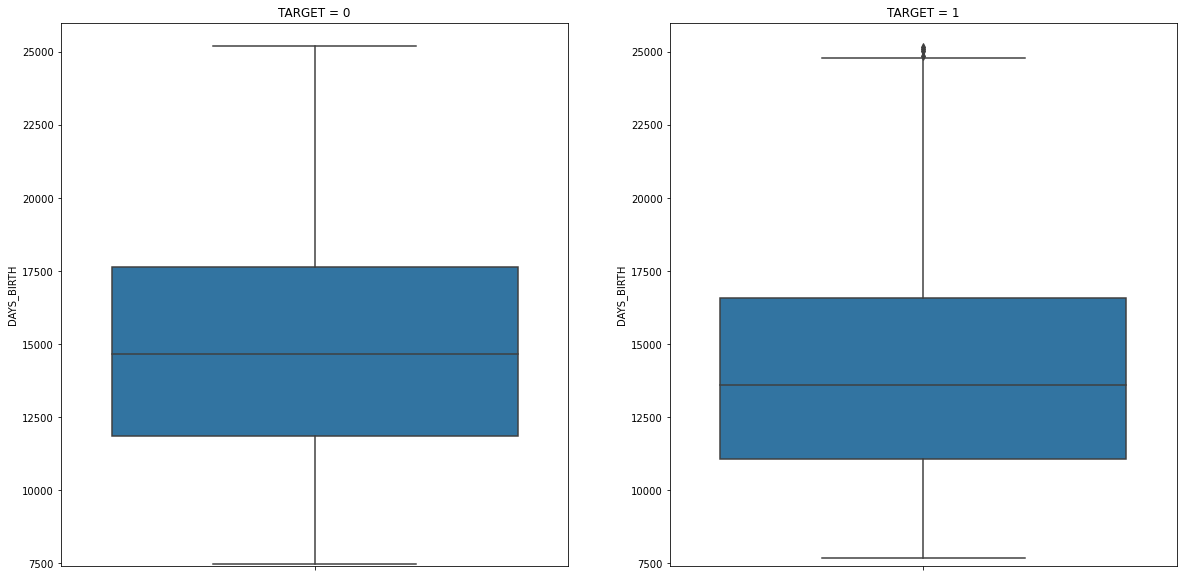

In [55]:
#spread of data regarding the clients' age across targets

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("TARGET = 0")
plt.ylim(7400,26000)
sns.boxplot(x ='DAYS_BIRTH',data=df_app0,orient='v')
plt.subplot(1, 2, 2)
plt.title("TARGET = 1")
plt.ylim(7400,26000)
sns.boxplot(x ='DAYS_BIRTH',data=df_app1,orient='v')

plt.show()

### Dropping unwanted columns

In [56]:
#Dropping columns which we do not intend to use for further analysis

df_app =df_app.drop(labels=['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],axis=1)
df_app0 =df_app0.drop(labels=['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],axis=1)
df_app1 =df_app1.drop(labels=['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],axis=1)

## Correlation

#### For target = 0

In [57]:
#Finding out the correlation among various variables in the dataframe

corr0 = df_app0.loc[:, df_app0.columns != 'TARGET'].corr() #Compute correlation among all numeric columns except target
corr0 = corr0.where(np.triu(np.ones(corr0.shape),k=1).astype(np.bool)) #Replace duplicates with 'NaN'
corr0_df = corr0.unstack().reset_index()
corr0_df.columns = ['VARIABLE1','VARIABLE2','CORRELATION']
corr0_df.dropna(subset=['CORRELATION'],inplace = True) #Remove missing values
corr0_df['CORRELATION_ABS'] = corr0_df['CORRELATION'].abs() #Convert negative correlation to positive values 
corr0_df.sort_values('CORRELATION_ABS',ascending=False,inplace=True)
corr0_df.head(10)

,VARIABLE1,VARIABLE2,CORRELATION,CORRELATION_ABS
598,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.99849,0.99849
148,AMT_GOODS_PRICE,AMT_CREDIT,0.98673,0.98673
320,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89328,0.89328
628,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86145,0.86145
419,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86042,0.86042
509,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.82083,0.82083
149,AMT_GOODS_PRICE,AMT_ANNUITY,0.76695,0.76695
119,AMT_ANNUITY,AMT_CREDIT,0.76212,0.76212
389,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.46160,0.46160
479,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.44264,0.44264


#### For target = 1

In [58]:
corr1 = df_app1.loc[:, df_app1.columns != 'TARGET'].corr()
corr1 = corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
corr1_df = corr1.unstack().reset_index()
corr1_df.columns = ['VARIABLE1','VARIABLE2','CORRELATION']
corr1_df.dropna(subset=['CORRELATION'],inplace = True)
corr1_df['CORRELATION_ABS'] = corr1_df['CORRELATION'].abs()
corr1_df.sort_values('CORRELATION_ABS',ascending=False,inplace=True)
corr1_df.head(10)

,VARIABLE1,VARIABLE2,CORRELATION,CORRELATION_ABS
598,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.99829,0.99829
148,AMT_GOODS_PRICE,AMT_CREDIT,0.98280,0.98280
320,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89383,0.89383
628,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86796,0.86796
419,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.84687,0.84687
509,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.76825,0.76825
149,AMT_GOODS_PRICE,AMT_ANNUITY,0.74938,0.74938
119,AMT_ANNUITY,AMT_CREDIT,0.74871,0.74871
389,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.50675,0.50675
479,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.47827,0.47827


##### The variables with the highest correlation are the same for both the target vriables in the same order. Moreover, for the top 4 correlation, even the correlation values are almost the same.

## Bivariate Analysis

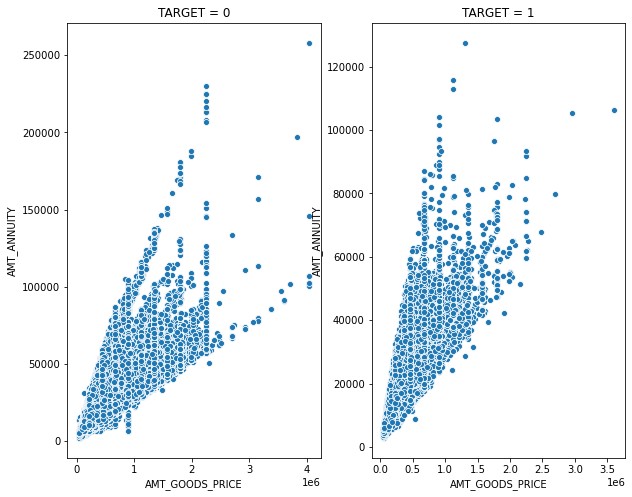

In [59]:
#Visualizing the relationship between the price of goods and loan annuity across targets

plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.title('TARGET = 0')
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_ANNUITY',data=df_app0)
plt.subplot(1, 2, 2)
plt.title('TARGET = 1')
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_ANNUITY',data=df_app1)
plt.show()

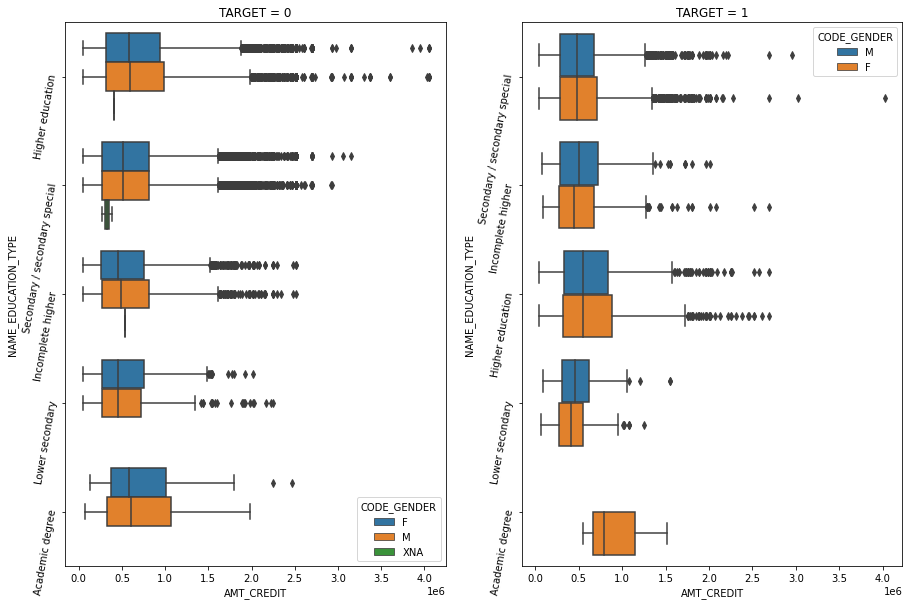

In [60]:
#Visualizing the spread of credit on the basis of education of the clients across targets

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.title('TARGET = 0')
plt.yticks(rotation=80)
sns.boxplot(x='AMT_CREDIT',y='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=df_app0)
plt.subplot(1, 2, 2)
plt.title('TARGET = 1')
plt.yticks(rotation=80)
sns.boxplot(x='AMT_CREDIT',y='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=df_app1)
plt.show()

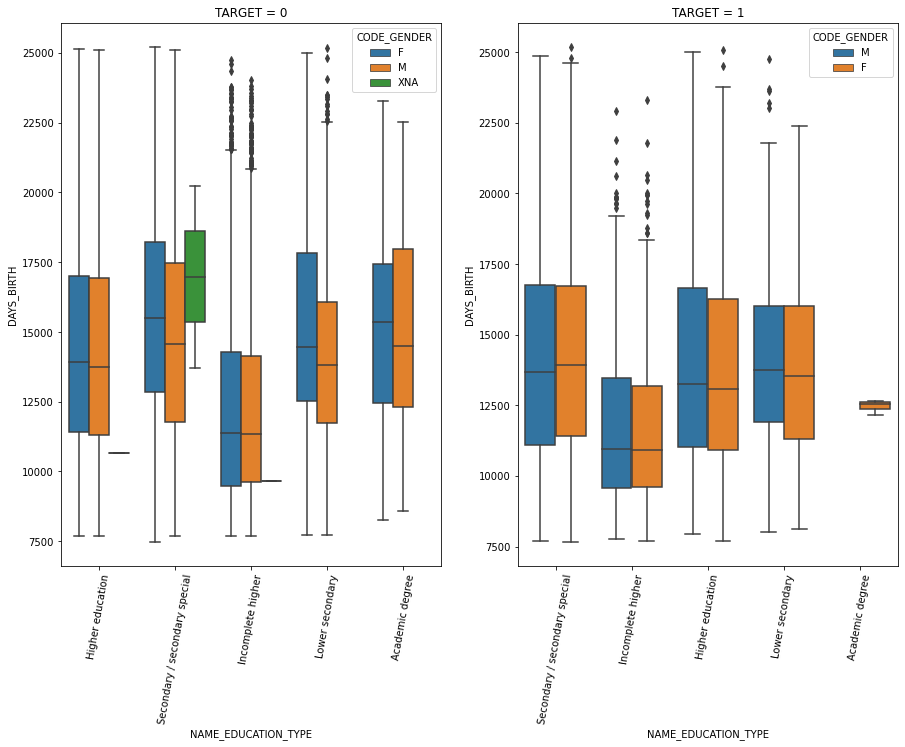

In [61]:
##Visualizing the spread of clients' age on the basis of education of the clients across targets

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.title('TARGET = 0')
plt.xticks(rotation=80)
sns.boxplot(y='DAYS_BIRTH',x='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=df_app0)
plt.subplot(1, 2, 2)
plt.title('TARGET = 1')
plt.xticks(rotation=80)
sns.boxplot(y='DAYS_BIRTH',x='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=df_app1)
plt.show()

In [62]:
df_prevapp = pd.read_csv('previous_application.csv')

In [63]:
df_prevapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,Y,1,0.00000,0.18283,0.86734,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,nan,607500.00000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,nan,112500.00000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,high,Cash X-Sell: high,365243.00000,-271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,nan,450000.00000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,middle,Cash X-Sell: middle,365243.00000,-482.00000,-152.00000,-182.00000,-177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,nan,337500.00000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [64]:
df_prevapp.shape

(1670214, 37)

In [65]:
df_prevapp.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [66]:
df_prevapp.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [67]:
#Merging the data of current and previous loan applications on the basis of current loan ID

df_merged = pd.merge(left=df_app,right=df_prevapp,how='inner',on='SK_ID_CURR',suffixes='_x')

In [68]:
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_BRACKETS,CREDIT_BRACKETS,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,9461,637,3648.00000,2120,Laborers,1.00000,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,No,2.00000,2.00000,2.00000,2.00000,1134.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,High,Low,1038818,Consumer loans,9251.77500,179055.00000,179055.00000,0.00000,179055.00000,SATURDAY,9,Y,1,0.00000,nan,nan,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.00000,low_normal,POS other with interest,365243.00000,-565.00000,125.00000,-25.00000,-17.00000,0.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,16765,1188,1186.00000,291,Core staff,2.00000,MONDAY,0,0,0,0,0,0,School,No,1.00000,0.00000,1.00000,0.00000,828.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Very High,Very High,1810518,Cash loans,98356.99500,900000.00000,1035882.00000,nan,900000.00000,FRIDAY,12,Y,1,nan,nan,nan,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,low_normal,Cash X-Sell: low,365243.00000,-716.00000,-386.00000,-536.00000,-527.00000,1.00000
2,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,16765,1188,1186.00000,291,Core staff,2.00000,MONDAY,0,0,0,0,0,0,School,No,1.00000,0.00000,1.00000,0.00000,828.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Very High,Very High,2636178,Consumer loans,64567.66500,337500.00000,348637.50000,0.00000,337500.00000,SUNDAY,17,Y,1,0.00000,nan,nan,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.00000,middle,POS industry with interest,365243.00000,-797.00000,-647.00000,-647.00000,-639.00000,0.00000
3,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,16765,1188,1186.00000,291,Core staff,2.00000,MONDAY,0,0,0,0,0,0,School,No,1.00000,0.00000,1.00000,0.00000,828.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Very High,Very High,2396755,Consumer loans,6737.31000,68809.50000,68053.50000,6885.00000,68809.50000,SATURDAY,15,Y,1,0.10006,nan,nan,XAP,Approved,-2341,Ca

In [69]:
df_merged.shape

(1140118, 81)

In [70]:
#Creating two dataframes to segregate dataset based on target value

df_merged0 = df_merged[df_merged.TARGET == 0]
df_merged1 = df_merged[df_merged.TARGET == 1]

In [71]:
df_merged0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_BRACKETS,CREDIT_BRACKETS,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,16765,1188,1186.00000,291,Core staff,2.00000,MONDAY,0,0,0,0,0,0,School,No,1.00000,0.00000,1.00000,0.00000,828.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Very High,Very High,1810518,Cash loans,98356.99500,900000.00000,1035882.00000,nan,900000.00000,FRIDAY,12,Y,1,nan,nan,nan,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,low_normal,Cash X-Sell: low,365243.00000,-716.00000,-386.00000,-536.00000,-527.00000,1.00000
2,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,16765,1188,1186.00000,291,Core staff,2.00000,MONDAY,0,0,0,0,0,0,School,No,1.00000,0.00000,1.00000,0.00000,828.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Very High,Very High,2636178,Consumer loans,64567.66500,337500.00000,348637.50000,0.00000,337500.00000,SUNDAY,17,Y,1,0.00000,nan,nan,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.00000,middle,POS industry with interest,365243.00000,-797.00000,-647.00000,-647.00000,-639.00000,0.00000
3,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,16765,1188,1186.00000,291,Core staff,2.00000,MONDAY,0,0,0,0,0,0,School,No,1.00000,0.00000,1.00000,0.00000,828.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Very High,Very High,2396755,Consumer loans,6737.31000,68809.50000,68053.50000,6885.00000,68809.50000,SATURDAY,15,Y,1,0.10006,nan,nan,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.00000,middle,POS household with interest,365243.00000,-2310.00000,-1980.00000,-1980.00000,-1976.00000,1.00000
4,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,19046,225,4260.00000,2531,Laborers,1.00000,MONDAY,0,0,0,0,0,0,Government,NaN,0.00000,0.00000,0.00000,0.00000,815.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Very Low,Very Low,1564014,Consumer loans,5357.25000,24282.00000,20106.00000,4860.00000,24282.0

In [72]:
df_merged1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_BRACKETS,CREDIT_BRACKETS,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,9461,637,3648.00000,2120,Laborers,1.00000,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,No,2.00000,2.00000,2.00000,2.00000,1134.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,High,Low,1038818,Consumer loans,9251.77500,179055.00000,179055.00000,0.00000,179055.00000,SATURDAY,9,Y,1,0.00000,nan,nan,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.00000,low_normal,POS other with interest,365243.00000,-565.00000,125.00000,-25.00000,-17.00000,0.00000
148,100047,1,Cash loans,M,N,Y,0,202500.00000,1193580.00000,35028.00000,855000.00000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.02516,17482,1262,1182.00000,1029,Laborers,2.00000,TUESDAY,0,0,0,0,0,0,Business Entity Type 3,No,0.00000,0.00000,0.00000,0.00000,1075.00000,0.00000,0.00000,0.00000,2.00000,0.00000,4.00000,High,Very High,1472630,Revolving loans,22500.00000,0.00000,450000.00000,nan,nan,SATURDAY,14,Y,1,nan,nan,nan,XAP,Approved,-1172,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.00000,XNA,Card X-Sell,365243.00000,365243.00000,365243.00000,365243.00000,365243.00000,0.00000
149,100047,1,Cash loans,M,N,Y,0,202500.00000,1193580.00000,35028.00000,855000.00000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.02516,17482,1262,1182.00000,1029,Laborers,2.00000,TUESDAY,0,0,0,0,0,0,Business Entity Type 3,No,0.00000,0.00000,0.00000,0.00000,1075.00000,0.00000,0.00000,0.00000,2.00000,0.00000,4.00000,High,Very High,2426800,Cash loans,11117.70000,157500.00000,157500.00000,nan,157500.00000,FRIDAY,15,Y,1,nan,nan,nan,XNA,Approved,-1467,Cash through the bank,XAP,Family,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.00000,high,Cash X-Sell: high,365243.00000,-1437.00000,-747.00000,-1167.00000,-1163.00000,1.00000
150,100047,1,Cash loans,M,N,Y,0,202500.00000,1193580.00000,35028.00000,855000.00000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.02516,17482,1262,1182.00000,1029,Laborers,2.00000,TUESDAY,0,0,0,0,0,0,Business Entity Type 3,No,0.00000,0.00000,0.00000,0.00000,1075.00000,0.00000,0.00000,0.00000,2.00000,0.00000,4.00000,High,Very High,1021215,Cash loans,31674.87000,675000.00000,7

In [73]:
print('Imbalance Ratio : ', round(len(df_merged0)/len(df_merged1),4))

Imbalance Ratio :  9.7219


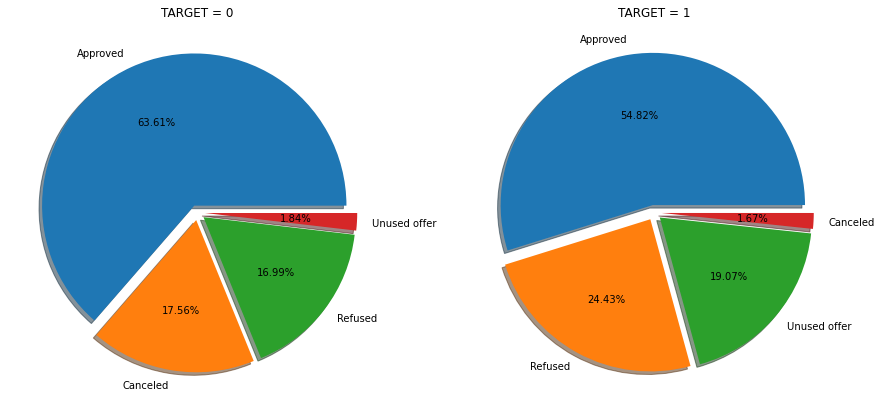

In [74]:
#Breakdown of the previous loan application status across target values

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.title('TARGET = 0')
plt.pie(x=df_merged0['NAME_CONTRACT_STATUS'].value_counts(),autopct='%0.2f%%',labels=df_merged0['NAME_CONTRACT_STATUS'].unique(),shadow=True,explode=[0.05,0.05,0.05,0.05])
plt.subplot(1, 2, 2)
plt.title('TARGET = 1')
plt.pie(x=df_merged1['NAME_CONTRACT_STATUS'].value_counts(),autopct='%0.2f%%',labels=df_merged1['NAME_CONTRACT_STATUS'].unique(),shadow=True,explode=[0.05,0.05,0.05,0.05])
plt.show()

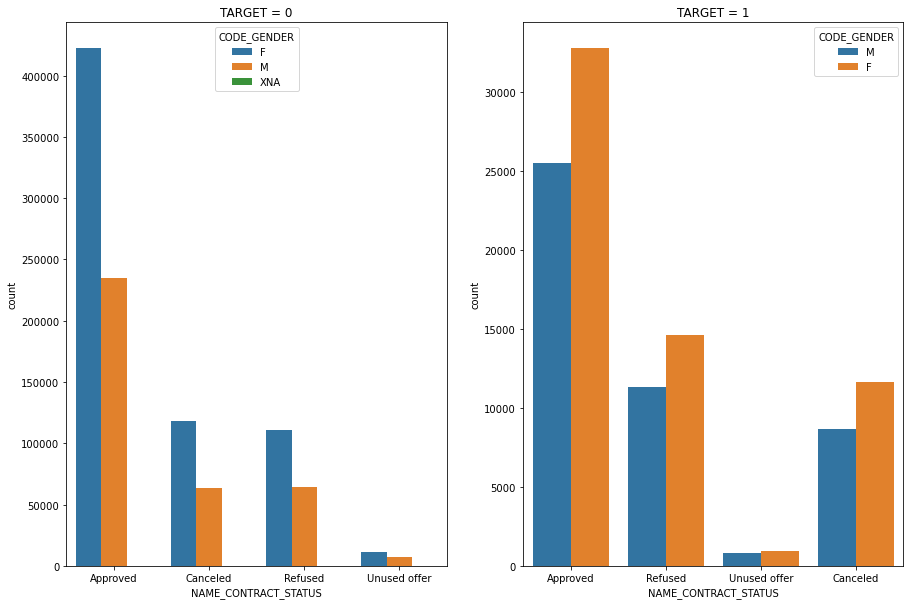

In [75]:
#Gender-wise breakdown of the previous loan application status across target values

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.title('TARGET = 0')
sns.countplot(x='NAME_CONTRACT_STATUS',hue='CODE_GENDER',data=df_merged0)
plt.subplot(1, 2, 2)
plt.title('TARGET = 1')
sns.countplot(x='NAME_CONTRACT_STATUS',hue='CODE_GENDER',data=df_merged1)
plt.show()

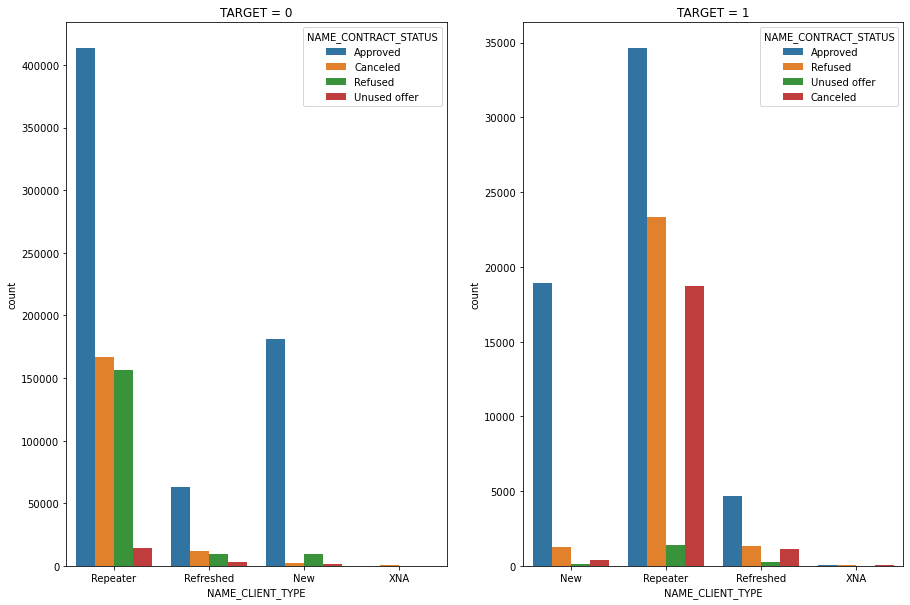

In [76]:
#Breakdown of the previous loan application status on the basis of a client being an old/new/refreshed client across target values

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.title('TARGET = 0')
sns.countplot(x='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS',data=df_merged0)
plt.subplot(1, 2, 2)
plt.title('TARGET = 1')
sns.countplot(x='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS',data=df_merged1)
plt.show()

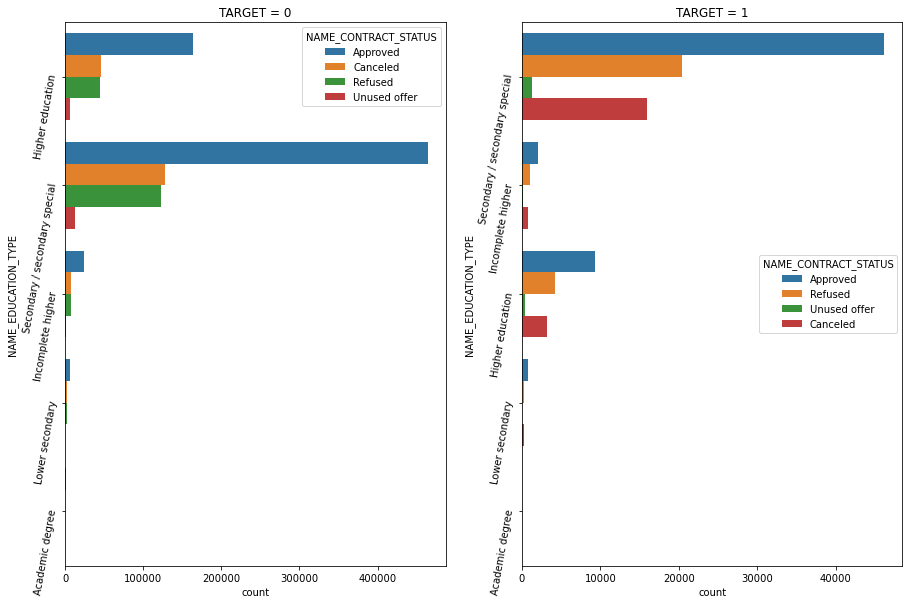

In [77]:
#Breakdown of the previous loan application status on the basis of clients' education level across target values

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.title('TARGET = 0')
plt.yticks(rotation=80)
sns.countplot(y='NAME_EDUCATION_TYPE',hue='NAME_CONTRACT_STATUS',data=df_merged0)
plt.subplot(1, 2, 2)
plt.title('TARGET = 1')
plt.yticks(rotation=80)
sns.countplot(y='NAME_EDUCATION_TYPE',hue='NAME_CONTRACT_STATUS',data=df_merged1)
plt.show()